In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('spotify.csv')
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [ ]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful ?

# Check for null values
print("Null values in each column before cleaning:")
print(df.isnull().sum())

Null values in each column before cleaning:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


Null values are not present

In [ ]:
duplicates  = df.duplicated().sum()
print("Number of duplicate rows before cleaning:", duplicates)

if duplicates > 0:
  df.drop_duplicates(inplace = True)
  print("Duplicate rows removed successfully")
else:
  print("No duplicate rows found")

Number of duplicate rows before cleaning: 27
Duplicate rows removed successfully


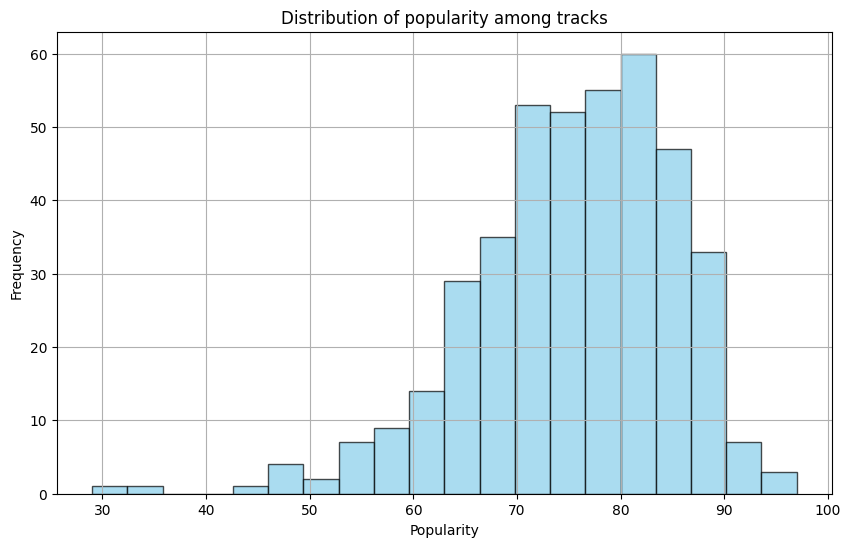

In [ ]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram ?

plt.figure(figsize = (10, 6))
plt.hist(df['Popularity'], bins = 20, color = 'skyblue', edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of popularity among tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

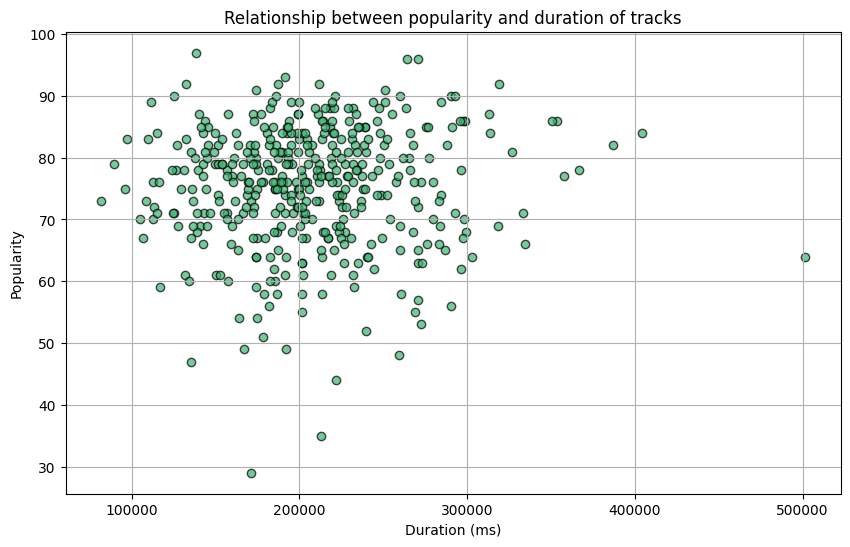

In [ ]:
# 3. Is there any relationship between the popularity and the duration of tracks? explore this using a scatter plot ?

plt.figure(figsize = (10,6))
plt.scatter(df['Duration (ms)'], df['Popularity'], alpha = 0.7 , color = 'mediumseagreen', edgecolor = 'black')
plt.title('Relationship between popularity and duration of tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

INSIGHTS:
* There doesn't appear to be a strong linear relationship between track duration and popularity.

* Popular tracks are distributed across a range of durations, with no clear trend indicating that longer or shorter tracks are inherently more popular.

In [ ]:
artist_track_counts = df['Artist'].value_counts()
artist_track_counts

,count
Artist,
Drake,17
Eminem,11
Flo Rida,10
Ludacris,10
Timbaland,10
...,...
Arizona Zervas,1
Fivio Foreign,1
Pressa,1


The artist with the highest number of tracks is 'Drake' with 17 tracks.


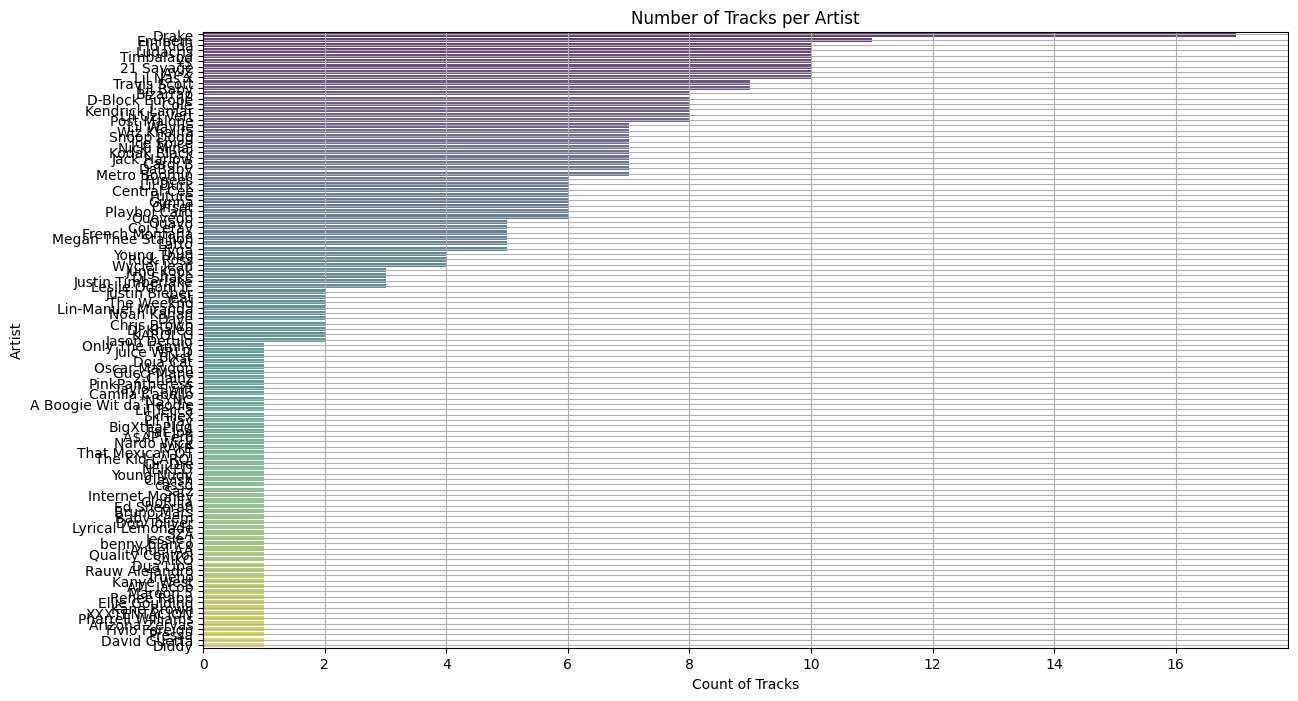

In [ ]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a countplot

# Count the number of tracks for each artist
artist_track_counts = df['Artist'].value_counts()

top_artist = artist_track_counts.idxmax()
top_artist_count = artist_track_counts.max()

print(f"The artist with the highest number of tracks is '{top_artist}' with {top_artist_count} tracks.")
# Plot a countplot for artists with the highest number of tracks
plt.figure(figsize = (14,8))
sns.countplot(y = df['Artist'], order = artist_track_counts.index, palette = 'viridis', alpha = 0.8)
plt.title('Number of Tracks per Artist')
plt.xlabel('Count of Tracks')
plt.ylabel('Artist')
plt.grid(True)
plt.show()


In [ ]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each ?

least_popular_tracks = df.sort_values('Popularity').head(5)

print("Top 5 least popular tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])


Top 5 least popular tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


Top 5 most popular artists based on average popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


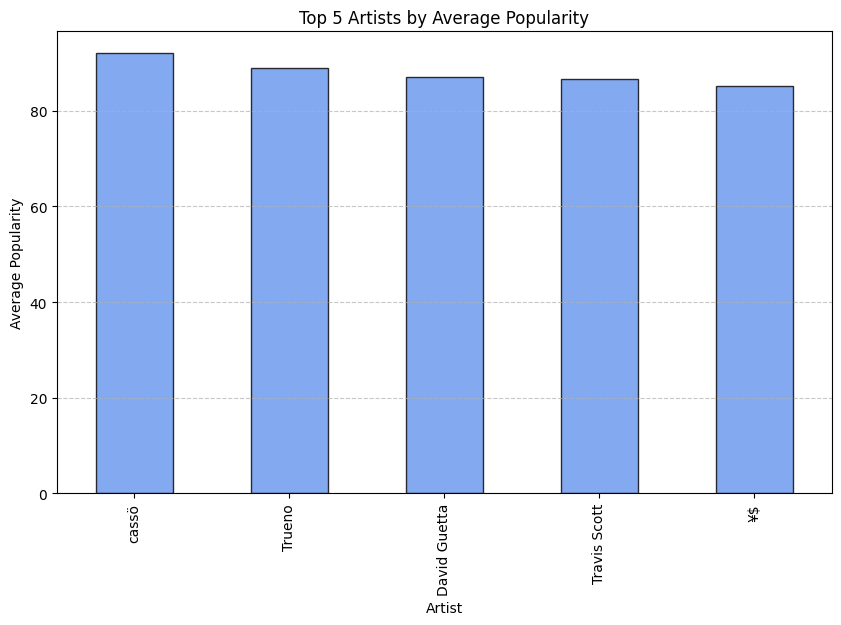

In [ ]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? calculate and
# display the average popularity for each artist ?

average_popularity_per_artist = df.groupby('Artist')['Popularity'].mean().sort_values(ascending = False)

top_5_artists = average_popularity_per_artist.head(5)

print("Top 5 most popular artists based on average popularity:")
print(top_5_artists)

# visualization
plt.figure(figsize = (10,6))
top_5_artists.plot(kind = 'bar', color = 'cornflowerblue', edgecolor = 'black', alpha = 0.8)
plt.title('Top 5 Artists by Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.xticks(rotation = 90,)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 7. for the top 5 most popular artists, what are their most popular tracks? List the track name for each artist ?

top_5_artists_names  = top_5_artists.index

# Filter data for the top 5 artists
top_5_artists_data = df[df['Artist'].isin(top_5_artists_names)]

# Find the most popular track for each artist
most_popular_tracks = top_5_artists_data.loc[top_5_artists_data.groupby('Artist')['Popularity'].idxmax()]

# Select relevant columns to display
moat_popular_tracks = most_popular_tracks[['Artist', 'Track Name', 'Popularity']]

most_popular_tracks


,Artist,Track Name,Popularity,Duration (ms),Track ID
200,David Guetta,Baby Don't Hurt Me,87,140017,3BKD1PwArikchz2Zrlp1qi
30,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA
241,Trueno,Mamichula - con Nicki Nicole,89,219201,0TUW9faHNaBmi89wsYGp9y
140,cassö,Prada,92,132359,59NraMJsLaMCVtwXTSia8i
260,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN


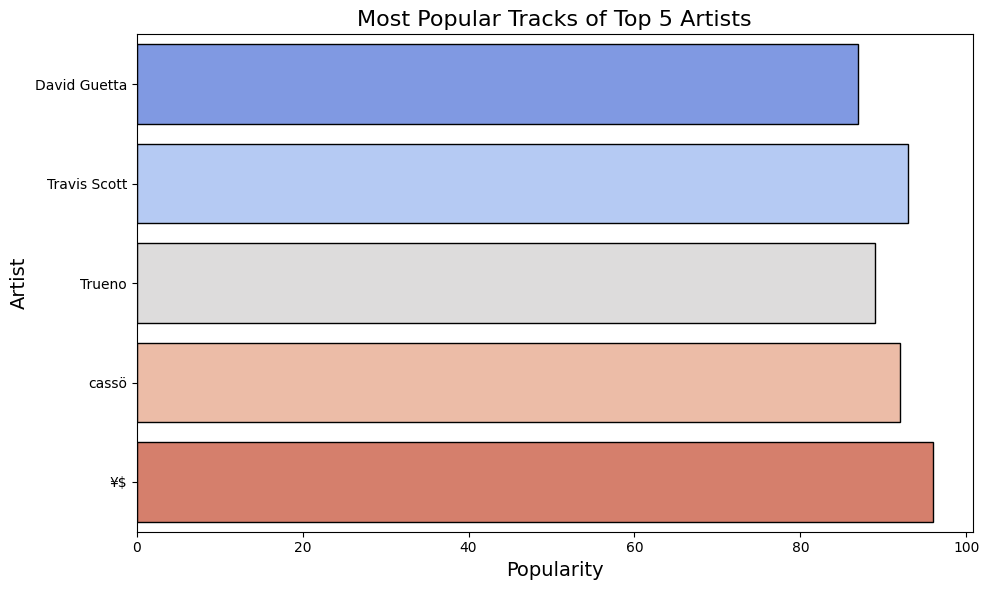

In [ ]:
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
sns.barplot( x= 'Popularity', y= 'Artist', data = most_popular_tracks , palette = 'coolwarm', edgecolor = 'black')
plt.title('Most Popular Tracks of Top 5 Artists', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.tight_layout()
plt.show()

Dataset size: 413 rows


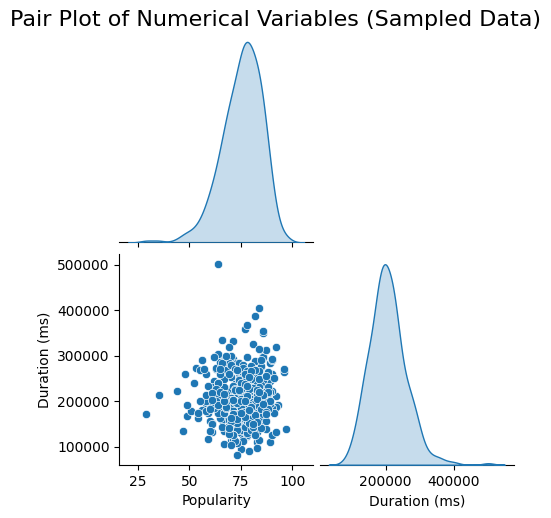

In [ ]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot ?

# Check the size of the dataset
print(f"Dataset size: {df.shape[0]} rows")

# Adjust the sample size if the dataset is smaller
sample_size = min(500, df.shape[0])  # Take up to 500 samples or less if the dataset is smaller
# Select numerical columns and sample rows
numerical_columns = ['Popularity', 'Duration (ms)']
sampled_data = df[numerical_columns].sample(sample_size, random_state=42)

# Create a pair plot
pair_plot = sns.pairplot(sampled_data, diag_kind='kde', corner=True, palette='coolwarm')

# Add a title
pair_plot.fig.suptitle('Pair Plot of Numerical Variables (Sampled Data)', y=1.02, fontsize=16)
plt.show()

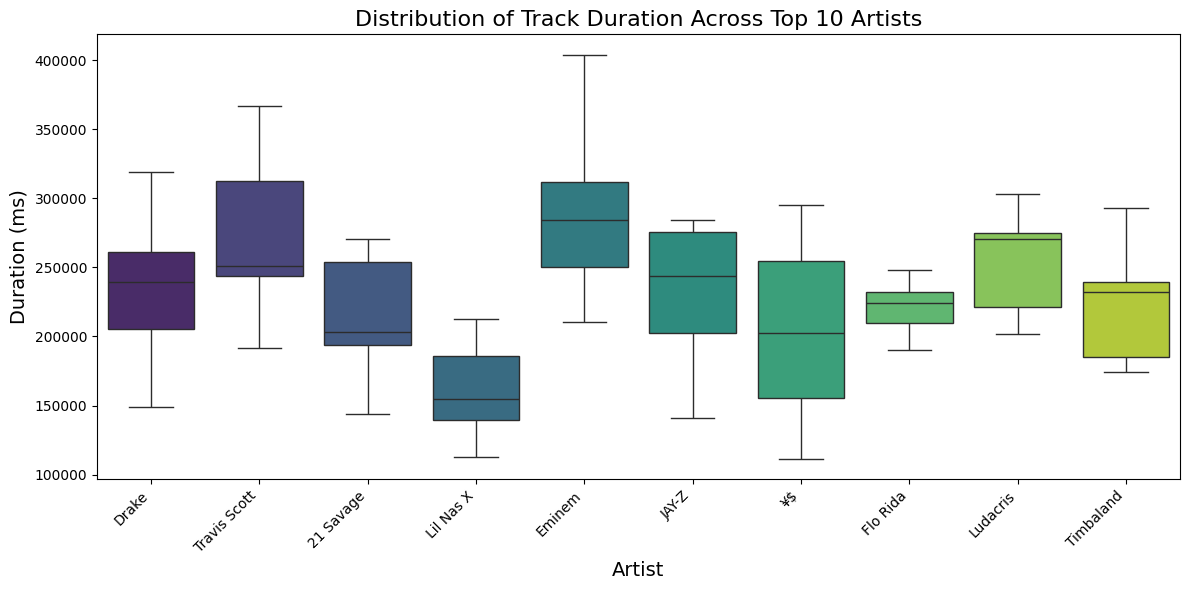

In [ ]:
# 9. Does the duration of tracks vary significantly across different artists? 	Explore this visually using a box plot or
# violin plot ?

df = df.dropna()

top_10_artists = df['Artist'].value_counts().head(10).index
simplified_data = df[df['Artist'].isin(top_10_artists)]

plt.figure(figsize = (12,6))
sns.boxplot(x = 'Artist', y = 'Duration (ms)', data = simplified_data,palette = 'viridis', showfliers=False, )
plt.title('Distribution of Track Duration Across Top 10 Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



INSIGHTS:
* Each box represents the interquartile range (IQR) of track durations for a specific artist.

* The line inside each box indicates the median duration.

* The whiskers and the absence of outliers provide insights into the spread of durations for each artist.

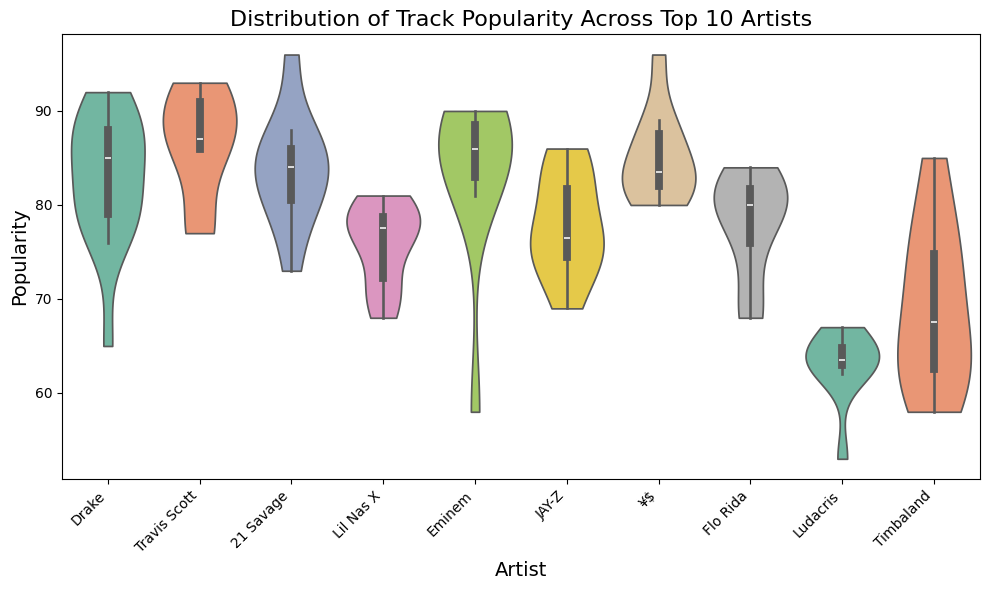

In [ ]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
# violin plot.

plt.figure(figsize = (10,6))
sns.violinplot(x = 'Artist', y = 'Popularity', data = simplified_data, palette = 'Set2', cut = 0)
plt.title('Distribution of Track Popularity Across Top 10 Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()